# Homework 2 Coding Exercises

In [108]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

## 5). 
We examine the *Fitzhugh-Nagumo* model looking for sustained oscillations.

### a).
We first examine the model with an input current of 0 and $\epsilon=1$ to investigate the dynamics of different initial condtions. We start with $u(0)=w(0)=0$.

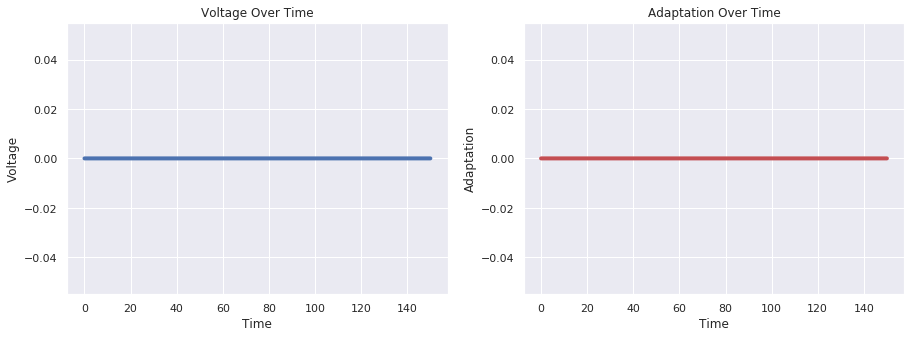

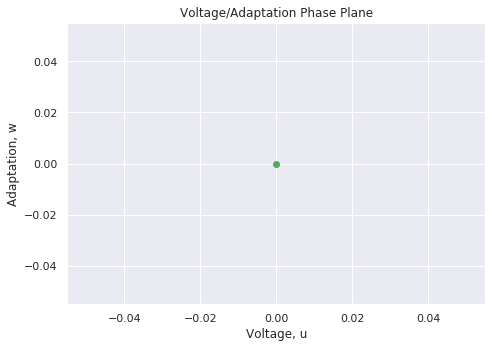

In [93]:
eps = 1 # adaptation rate
g = 1 # adaptation strength
I = 0   # input stimulus current

T = 150      # total time to run
dt = 0.01   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array (mV)
tvec = np.linspace(0,T,nt)     # time vector (ms)

#NOTE: This implicitly sets u(0)=w(0)=0
u = np.zeros(nt)   # vector of voltage entries
w = np.zeros(nt)   # vector of adaptation variable entries

for j in np.arange(nt-1):
    u[j+1] = u[j]+dt*(u[j]*(u[j]-1/2)*(1-u[j])-w[j]+I)
    w[j+1] = w[j]+dt*(eps*(u[j]-g*w[j]))
    
#Plotting
sb.set()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(tvec,u,linewidth=4.0)
ax[0].set_title('Voltage Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Voltage')

ax[1].plot(tvec,w,linewidth=4.0,color='r')
ax[1].set_title('Adaptation Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Adaptation')

fig = plt.figure(figsize=(7,5))     
plt.plot(u,w,linewidth=10.0)
plt.title('Voltage/Adaptation Phase Plane')
plt.xlabel('Voltage, u')
plt.ylabel('Adaptation, w')
plt.plot(u[0],w[0],'go')
#plt.show()

plt.tight_layout()

In the two time series plots above for voltage and adaptation we see a steady state value of 0. We also see this exemplfied in the phase plane where the values for voltage and adaption are constant. Given that the input current is $I=0$ and the initial condtions are zero this makes sense. Starting with zero voltage and having no input current there is nothing to stimulate the system and therefore no spiking.     

We next change the initial condtions to $u(0)=w(0)=0.1$ to see what happens noting that the input current is still 0.

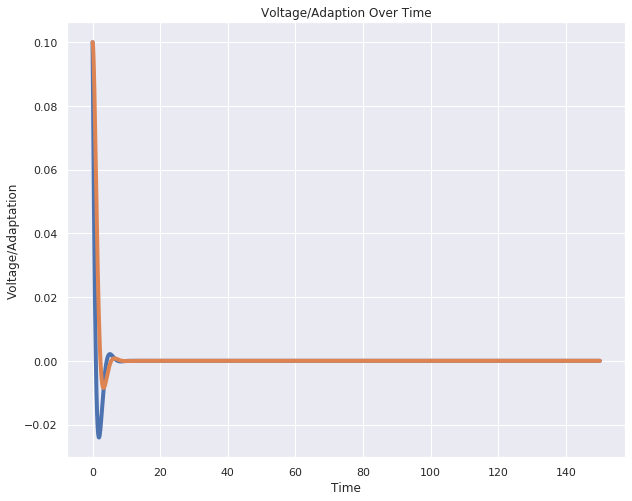

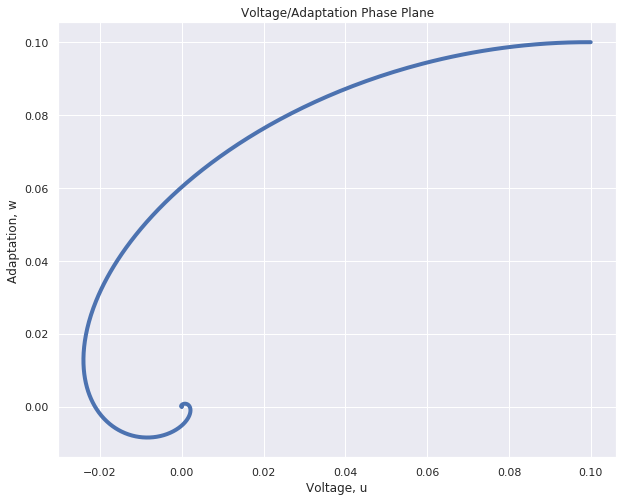

In [94]:
u = np.zeros(nt)   # vector of voltage entries
w = np.zeros(nt)   # vector of adaptation variable entries
#u(0)=w(0)=0.1
u[0] = 0.1
w[0] = 0.1

for j in np.arange(nt-1):
    u[j+1] = u[j]+dt*(u[j]*(u[j]-1/2)*(1-u[j])-w[j]+I)
    w[j+1] = w[j]+dt*(eps*(u[j]-g*w[j]))
    
#Plotting
fig = plt.figure(figsize=(10,8))       
plt.plot(tvec,u,linewidth=4.0)
plt.plot(tvec,w,linewidth=4.0)
plt.title('Voltage/Adaption Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage/Adaptation')
plt.show()

fig = plt.figure(figsize=(10,8))     
plt.plot(u,w,linewidth=4.0)
plt.title('Voltage/Adaptation Phase Plane')
plt.xlabel('Voltage, u')
plt.ylabel('Adaptation, w')
plt.show()

Given non-zero initial condtions we can see in the plots above that spiking does occur, and that in general there are more interesting dynamics than with the intitial conditions of 0. In the time series plot we can see that there are no sustained oscillations, or any spiking for that matter. The voltage drops quickly and then rebounds to steady state. We see that the voltage and adaptation eventually settle into steady state at 0. This helps us understand the phase plane as a spiral that starts at 0.1 and is drawn into 0 voltage and 0 adaptation. Becuase the initial conditions are non-zero there is some pre-existing stimulus that causes the voltage and adaptation to change, but because the input current is zero the dynamics tend towards a steady state value of 0.

### b).
We next examine the model with an input current of 0.5 for different values of $\epsilon$ and analyze the results.

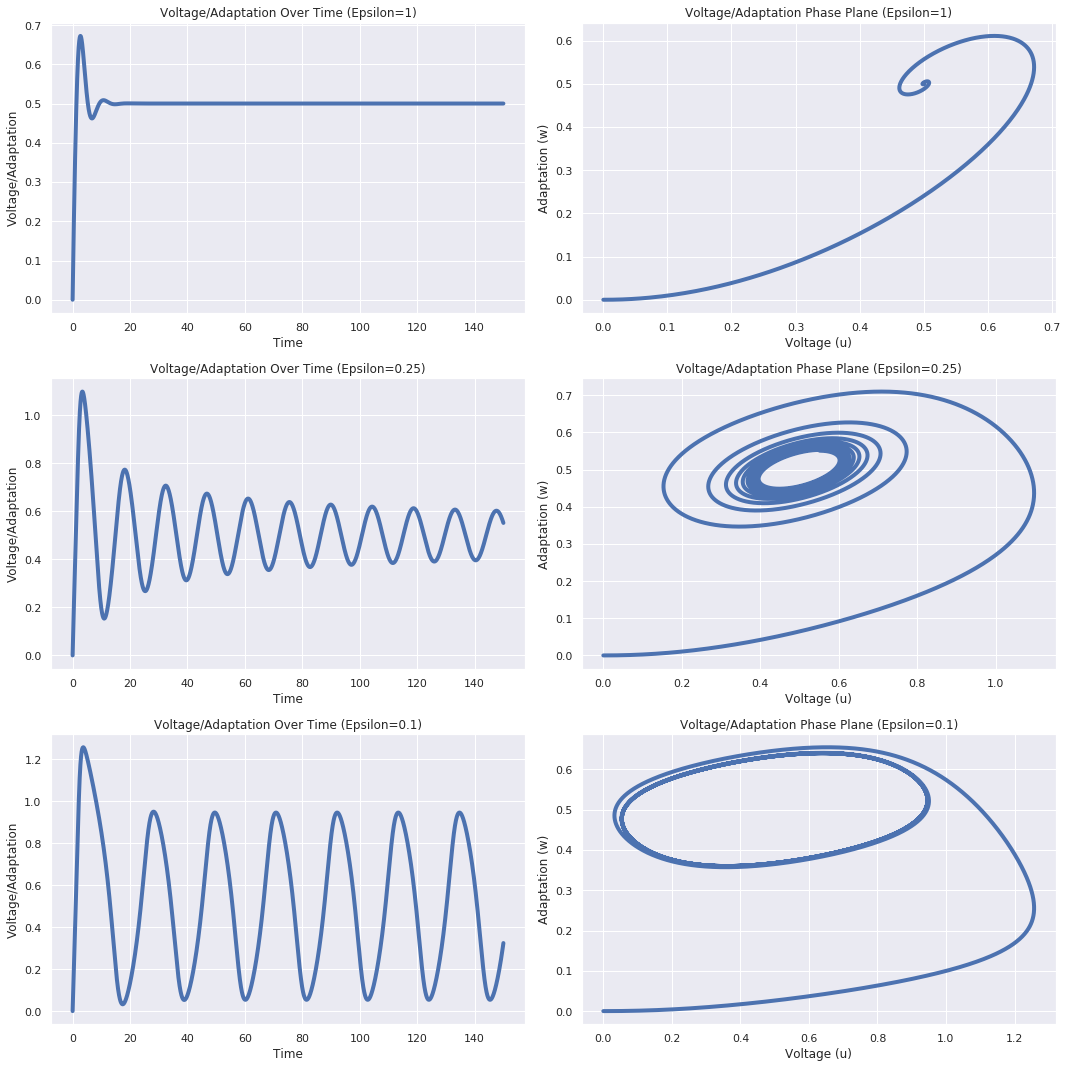

In [95]:
eps_vec = [1, 0.25, 0.1] # adaptation rate
I = 0.5   # input stimulus current
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
k=0

for ep in eps_vec:
    #NOTE: This implicitly sets u(0)=w(0)=0
    u = np.zeros(nt)   # vector of voltage entries
    w = np.zeros(nt)   # vector of adaptation variable entries

    for j in np.arange(nt-1):
        u[j+1] = u[j]+dt*(u[j]*(u[j]-1/2)*(1-u[j])-w[j]+I)
        w[j+1] = w[j]+dt*(ep*(u[j]-g*w[j]))
    
    ax[k][0].plot(tvec,u,linewidth=4.0)
    ax[k][0].set_title('Voltage/Adaptation Over Time (Epsilon='+str(ep)+')')
    ax[k][0].set_xlabel('Time')
    ax[k][0].set_ylabel('Voltage/Adaptation')
    ax[k][1].plot(u,w,linewidth=4.0)
    ax[k][1].set_title('Voltage/Adaptation Phase Plane (Epsilon='+str(ep)+')')
    ax[k][1].set_xlabel('Voltage (u)')
    ax[k][1].set_ylabel('Adaptation (w)')
    
    k+=1
         
plt.tight_layout()

There are three pairs of plots above for $\epsilon=1,0.25,0.1$. In each pair there is a time series plot and phase plane of voltage and adaptation. 

For $\epsilon=1$ the we see the model gets sucked into a steady state value of $0.5$. This matches perfectly with the analysis from problem 3. In that problem we found that for a input current of $I=0.5$, the only steady state is at $\bar{u}=\bar{w}=0.5$. As well, we found that for $\epsilon=1$ the fixed point is a stable spiral and will pull in solution trajectories. This is exactly what we see exemplified in the first pair of plots. With such a high $\epsilon$ periodic spiking will not occur and solutions will tend towards the fixed point.

For $\epsilon=0.25$ we see the model appears to enter a limit cycle with sustained spiking with an amplitude of roughly $0.2$. However, we can see that the oscillations also appear to be slowly decaying. This is validated by the phase plane where we can see that the limit cycle is slowly decreasing orbit around the the fixed point $0.5,0.5$. Again, this matches with the analysis from problem 3. As discussed earlier, for $I=0.5$ there is one fixed point at $\bar{u}=\bar{w}=0.5$. Furthermore, we determined that only for $\epsilon<\frac{1}{4}$ would there be periodic spiking and at $\epsilon=\frac{1}{4}$ there would be a stable orbit. This appears to be the case in the second pair of plots where the solution is settling into a stable orbit with no sustained spiking.

Lastly, for $\epsilon=0.1$ we see the model again enters a limit cycle with sustained spiking of amplitude $\approx1$ (notably larger than with $\epsilon=0.25$). In problem 3 we determined that periodic spiking will occur for $\epsilon<\frac{1}{4}$ which is the case here. We can see that the solution enters a limit cycle and periodic spiking is exhibited.

Overall, these three pairs of plot are consistent and validate the analysis in problem 3 where we only find periodic spiking for $\epsilon<\frac{1}{4}$.

## 6).

### a).
We implement the Morris-Lecar model and examine periodic spiking.

In [85]:
# %%capture
from scipy.integrate import odeint

#Morris-Lecar parameters
tau_w = 25
g1 = 4.4
g2 = 8
gL = 2
v1 = 120
v2 = -84
vL = -60
u1 = -1.2
u2 = 18
u3 = 2
u4 = 30 
C = 20
I = 120

###################################################################
#Defining Morris-Lecar
def tauFunc(u):
    return tau_w / (np.cosh((u - u3) / (2*u4)))

def mFunc(u):
    return 0.5*(1 + np.tanh((u-u1) / u2))
    
def wFunc(u):
    return 0.5*(1 + np.tanh((u-u3) / u4))

def dudt(Y, t):
    u, w = Y
    m_0 = mFunc(u)
    
    return (1/C)*(-g1*m_0*(u-v1) - g2*w*(u-v2) - gL*(u-vL) + I)
    
def dwdt(Y, t):
    u, w = Y
    tau_u = tauFunc(u)
    w_0 = wFunc(u)
    
    return -(1/tau_u)*(w-w_0)

def system(Y,t):
    return [dudt(Y,t), dwdt(Y,t)]

#####################################################################
#Phase plane stuff
def pPlane():
    u = np.linspace(-60,60,20)
    w = np.linspace(0,0.55,20)

    U, W = np.meshgrid(u,w)

    x, y = np.zeros(U.shape), np.zeros(W.shape)

    ni, nj = U.shape

    for i in range(ni):
        for j in range(nj):
            yprime = system([U[i,j],W[i,j]],0)

            x[i,j] = yprime[0]
            y[i,j] = yprime[1]

    #Need to be changed
    # unull = u-u**3/3+I
    # wnull = b0+b1*u

    fig, ax = plt.subplots(figsize=(20,10))
    # ax.plot(u,unull,linewidth=4.0)
    # ax.plot(w,wnull,linewidth=4.0)
    ax.quiver(U,W,x,y,color='b')
#     ax.set_ylim([0, 1])
    
    return fig, ax

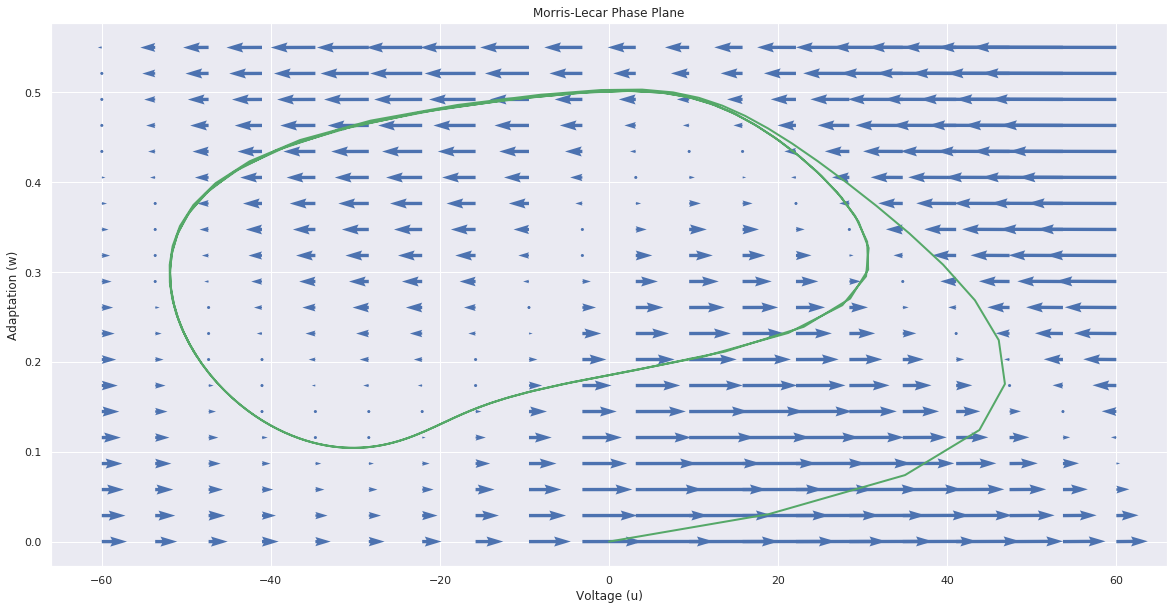

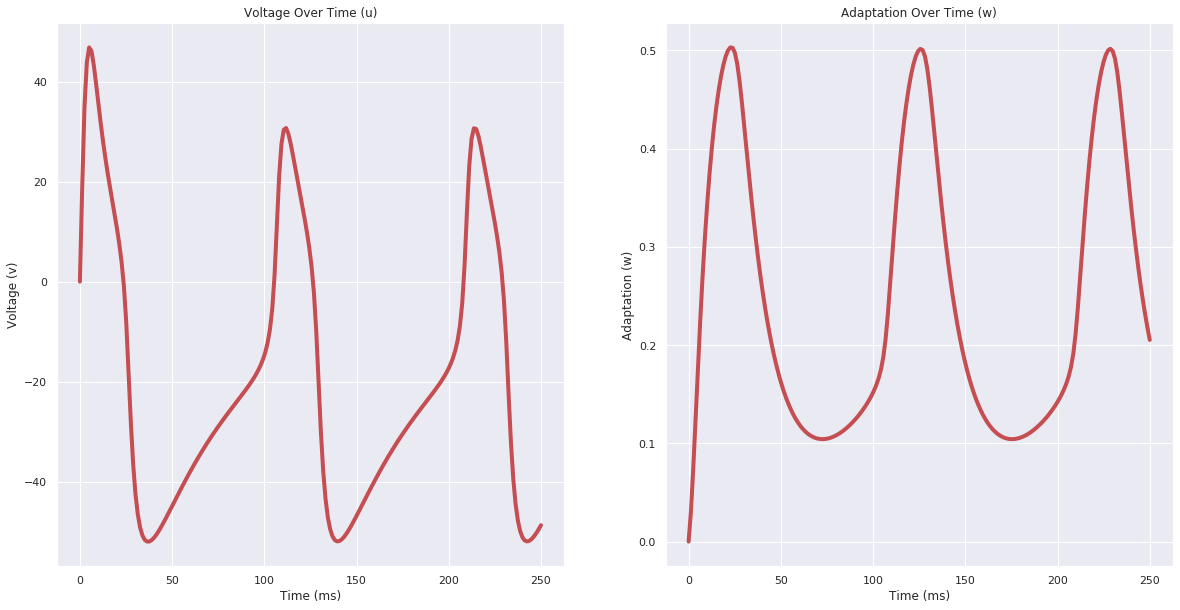

In [89]:
fig, ax = pPlane()

#Solving ODE
tvec = np.linspace(0,250,200)
ys = odeint(system,[0,0],tvec)

#Crude find period
# while True:
    

#Add to phase plane
ax.plot(ys[:,0],ys[:,1],'g',linewidth=2.0)
ax.set_title('Morris-Lecar Phase Plane')
ax.set_xlabel('Voltage (u)')
ax.set_ylabel('Adaptation (w)')

#Plot the solo curves
fig2, curve = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
curve[0].plot(tvec,ys[:,0], 'r', linewidth=4.0)
curve[0].set_title('Voltage Over Time (u)')
curve[0].set_ylabel('Voltage (v)')
curve[0].set_xlabel('Time (ms)')
curve[1].plot(tvec,ys[:,1], 'r', linewidth=4.0)
curve[1].set_title('Adaptation Over Time (w)')
curve[1].set_ylabel('Adaptation (w)')
curve[1].set_xlabel('Time (ms)');

# plt.tight_layout()

In the above plots we can see that with the initial conditions of $u(0)=w(0)=0$ periodic spiking occurs. The period of these spikes is $T\approx100ms$.

### b).
We change the input current to show that periodic spiking and a stationary steady state are possible given different initial conditions.

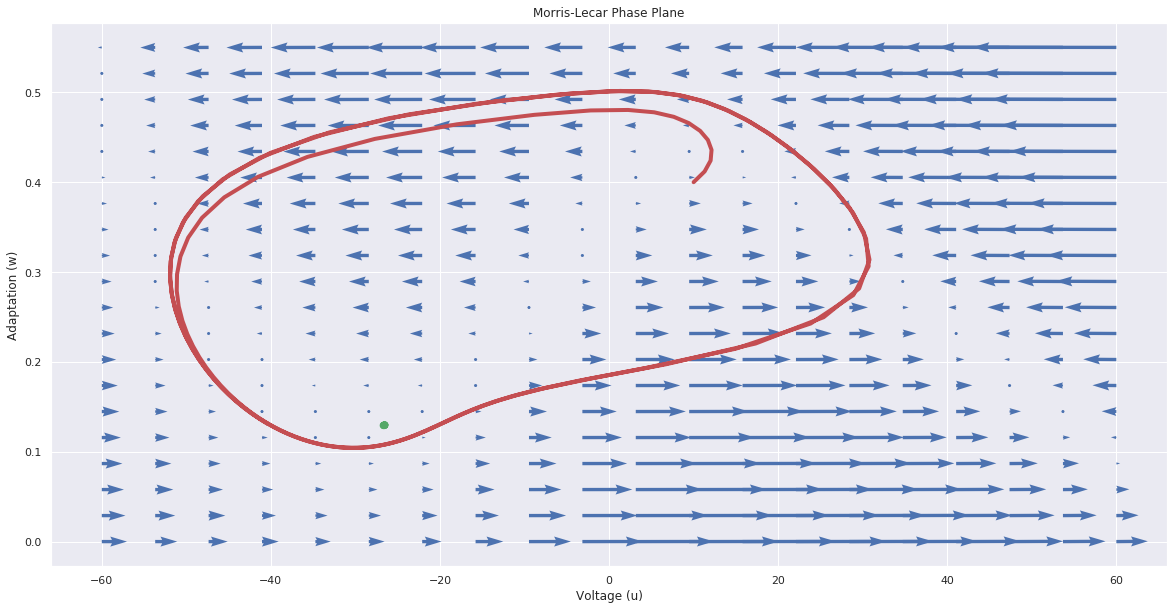

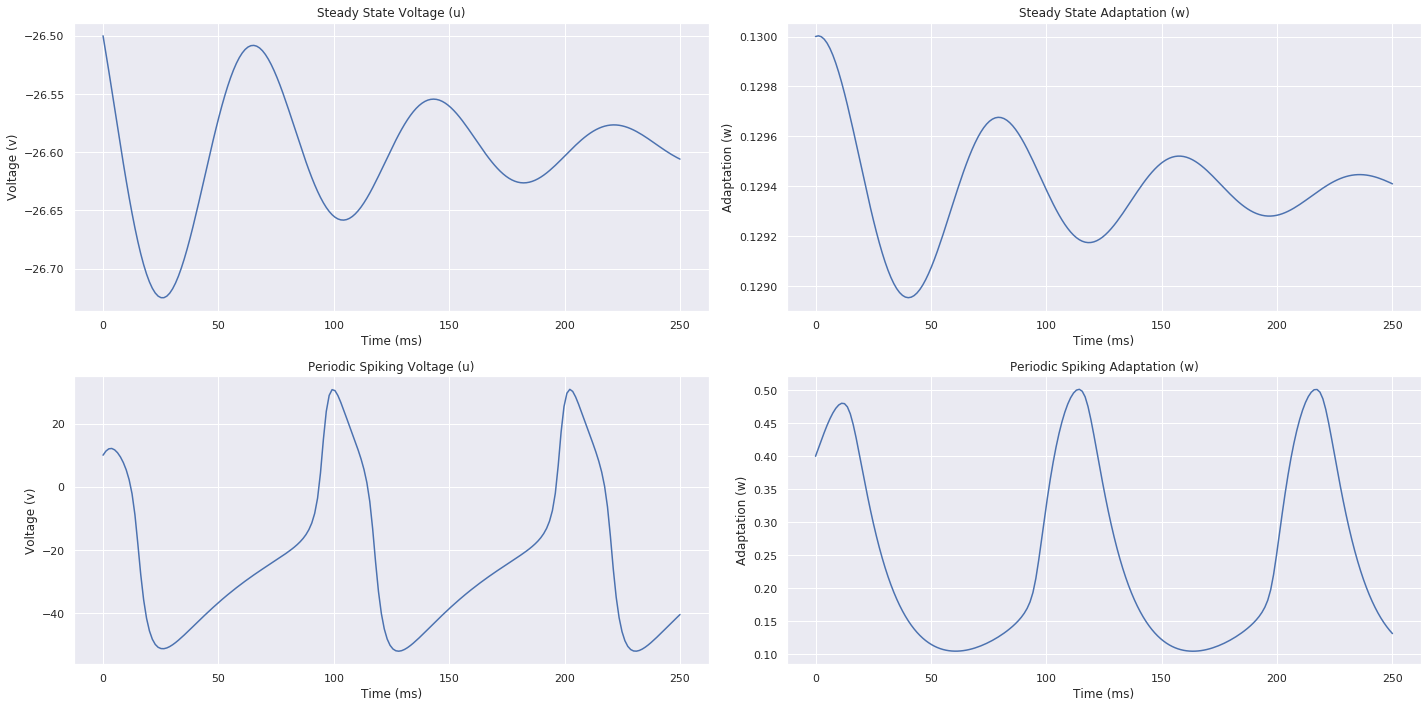

In [91]:
# %%capture
I = 90

#Phase plane stuff
fig, ax = pPlane()

#Solving ODE
tvec = np.linspace(0,250,200)
ss = odeint(system,[-26.5,0.13],tvec)
lc = odeint(system,[10,0.4],tvec)

#Add to phase plane
ax.plot(ss[:,0],ss[:,1],'g', linewidth=7.0)
ax.plot(lc[:,0],lc[:,1],'r', linewidth=4.0)
ax.set_title('Morris-Lecar Phase Plane')
ax.set_xlabel('Voltage (u)')
ax.set_ylabel('Adaptation (w)')

#Plot the solo curves
fig2, curve = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
curve[0][0].plot(tvec,ss[:,0])
curve[0][0].set_title('Steady State Voltage (u)')
curve[0][0].set_ylabel('Voltage (v)')
curve[0][0].set_xlabel('Time (ms)')
curve[0][1].plot(tvec,ss[:,1])
curve[0][1].set_title('Steady State Adaptation (w)')
curve[0][1].set_ylabel('Adaptation (w)')
curve[0][1].set_xlabel('Time (ms)')

curve[1][0].plot(tvec,lc[:,0])
curve[1][0].set_title('Periodic Spiking Voltage (u)')
curve[1][0].set_ylabel('Voltage (v)')
curve[1][0].set_xlabel('Time (ms)')
curve[1][1].plot(tvec,lc[:,1])
curve[1][1].set_title('Periodic Spiking Adaptation (w)')
curve[1][1].set_ylabel('Adaptation (w)')
curve[1][1].set_xlabel('Time (ms)');

plt.tight_layout()

In the above plots we can see that with $I=90$ the model can exhiit both sustained spiking and steady state qualitites. In the phase plane plot we see that initial conditions of $(-26.5,0.13)$ lead to a fixed point in roughly the same position. This is shown by the green dot in the phase plane plot. We also see that initial conditions of $(10,0.4)$ lead to periodic spiking -- shown by the red trajectory. This is further shown in the time series plots.

### c). 
We look for the rheobase -- the minimum current to generate periodic spiking.

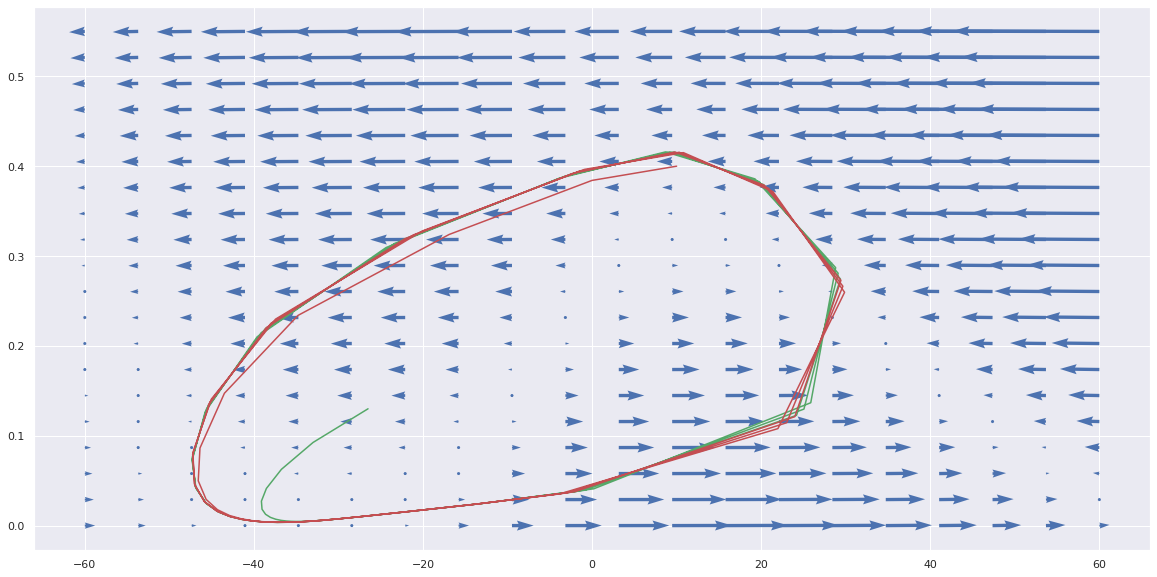

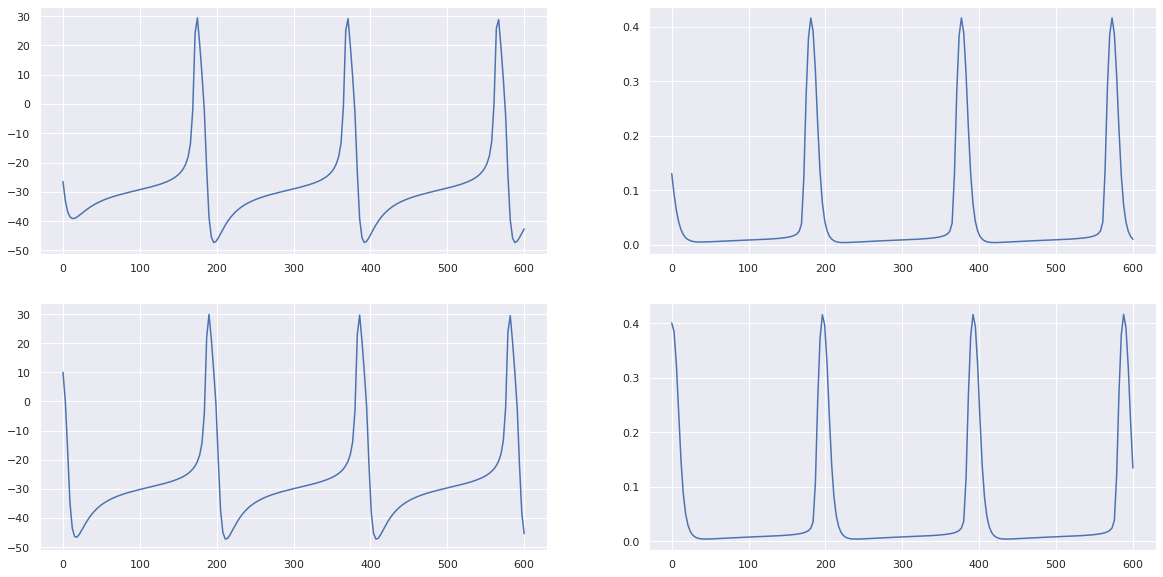

In [101]:
tau_w = 15
g1 = 4
u3 = 12
u4 = 17.4

I = 41

#Phase plane stuff
fig, ax = pPlane()

#Solving ODE
tvec = np.linspace(0,600,200)
ss = odeint(system,[-26.5,0.13],tvec)
lc = odeint(system,[10,0.4],tvec)

#Add to phase plane
ax.plot(ss[:,0],ss[:,1],'g')
ax.plot(lc[:,0],lc[:,1],'r')

#Plot the solo curves
fig2, curve = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
curve[0][0].plot(tvec,ss[:,0])
curve[0][1].plot(tvec,ss[:,1])

curve[1][0].plot(tvec,lc[:,0])
curve[1][1].plot(tvec,lc[:,1]);

We see that the Rheobase is $\approx41$, which is validated in the plots above.